# Exercise: Retail Inventory and Sales Analysis

## Background:
You are a data analyst in a retail company that manages a large inventory of various products and records sales transactions across multiple locations. Your task is to analyze the company's inventory and sales data to identify trends, inefficiencies, and opportunities for improvement.

## Data:
You are provided with two CSV files:
- `inventory_data.csv` - This file contains information about the inventory, including product IDs, descriptions, prices, and quantities in stock.
- `sales_transactions.csv` - This file records sales transactions, including transaction IDs, dates, product IDs, quantities sold, and store locations.

## Tasks:

### Load and Clean the Data:
1. Read both CSV files into DataFrames using pandas.
2. Identify and handle missing values, inconsistencies, and outliers in the data.

### SQL Integration:
1. Import the cleaned data into a SQL database (you can use SQLite, PostgreSQL, etc.).
2. Perform SQL queries to further clean and prepare the data for analysis.

### Inventory Analysis:
1. Identify products with low stock levels and suggest reordering quantities.
2. Calculate the total value of inventory on hand for each product category.

### Sales Analysis:
1. Analyze sales trends over time and identify peak sales periods.
2. Determine the best-selling products and their contribution to overall sales.

### Store Performance:
1. Evaluate the sales performance of each store location.
2. Identify any stores with significantly different sales patterns.

### Visualization:
1. Create visualizations to represent sales trends, inventory levels, and store performances.
2. Use charts and graphs that effectively communicate your findings.

### Insights and Recommendations:
1. Write a report summarizing your findings and analysis.
2. Provide actionable recommendations for inventory management and sales strategies.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


## Step 1: Data Loading and Column Cleanup
- Load CSV into pandas DataFrame.
- Clean and rename column names.
- Focus on pandas skill enhancement.


In [104]:
#------------------------inventory_data--------------- CLEAN UP USING PANDAS--------------------------------------------------

# Load the CSV file into a DataFrame
inventory_df = pd.read_csv('DataSet/inventory_data.csv')

#Renaming columns 
inventory_df.rename(columns={"ProductID": "Product_ID", "Categ@@ry": "Category", "Pr!ce":"Price", "Quantity_in_Stock":"Stock"},inplace=True)

# Checking rows for missing values 
missing_val1 = inventory_df[inventory_df.isnull().any(axis=1)]
# print(missing_val) #Checking the missing values and also the nr so I can evaluate if its worth changing them or I should drop those records
# print(len(missing_val))


missing_per_col = inventory_df.isnull().sum() #Checking mising values per each col
print(missing_per_col)


# Calculating the mean(avg) price for each category and  adding the mean price of category for the missing price values
# Also assuming that empty records on Stock columns implies there is  0 stock of that product
category_mean_price = inventory_df.groupby('Category')['Price'].mean()

for category in category_mean_price.index: ##.loc[] locates records based on condition, its now selecting 'Price' based on 2 condition
    inventory_df.loc[(inventory_df['Category'] == category) & (inventory_df['Price'].isnull()), 'Price'] = category_mean_price[category]

inventory_df['Stock'].fillna(0, inplace=True)



inventory_df.head(5)

Product_ID      0
Category        0
Description     0
Price          20
Stock          15
dtype: int64


,Product_ID,Category,Description,Price,Stock
0,1,Toys & Games,Fashion-Wear 1,278.918617,39.0
1,2,Sports & Outdoors,Kitchen-Tool 2,360.442790,28.0
2,3,Toys & Games,Sports-Gear 3,305.354054,24.0
3,4,Clothing,Toy-Item 4,276.992760,18.0
4,5,Electronics,Electro-Gadget 5,217.590852,67.0


In [105]:
#-----------------------sales_transactions---- CLEAN UP USING PANDAS --------------------------------------------------


sales_df = pd.read_csv('DataSet/sales_transactions.csv')
#Renaming columns for unifrom access 
sales_df.rename(columns={"TransactionID": "Transaction_ID", "ProductID": "Product_ID", }, inplace=True)

#Checking for missing values 
missing_val2 = sales_df[sales_df.isnull().any(axis=1)]
# print(missing_val2, f" Number of missing values: {len(missing_val2)}")

#Checking missing value per each column so I can decide how to move forward 
missing_values_per_column = sales_df.isnull().sum()
print(missing_values_per_column)

#I realized that the there are 30 records on Quantity_Sold columns missing from 40 in total, so I want to 
#investigate which location has the higest number of "Quantity Sold" missing records 
missing_values_per_store = missing_quantity_sold.groupby('Store_Location').size()
sorted_missing_values = missing_values_per_store.sort_values(ascending=False)
print(sorted_missing_values)


#Missing value on "Quantity_Sold" it will now be "Unknown", it is probarly a good idea to still keep the recrod since it has the other column recrods
sales_df["Store_Location"].fillna('Unknown', inplace=True)


#Missing value for "Quantity Sold", will be replaced with the mean Quantity Sold nr of each product ID 
sales_df['Quantity_Sold'] = sales_df.groupby('Product_ID')['Quantity_Sold'].transform(lambda x: x.fillna(x.mean()))


sales_df.head(5)


Transaction_ID     0
Date               0
Product_ID         0
Quantity_Sold     30
Store_Location    10
dtype: int64
Store_Location
Airport Kiosk, Houston          9
Mall Branch, Chicago            8
Suburban Outlet, Los Angeles    5
Downtown Store, New York        4
Online Shop, Phoenix            4
dtype: int64


,Transaction_ID,Date,Product_ID,Quantity_Sold,Store_Location
0,1,2022-09-04,410,3.0,"Suburban Outlet, Los Angeles"
1,2,2022-08-11,119,5.0,"Downtown Store, New York"
2,3,2022-10-01,459,6.0,"Airport Kiosk, Houston"
3,4,2022-02-24,232,4.0,"Airport Kiosk, Houston"
4,5,2022-11-26,457,5.0,"Online Shop, Phoenix"


Checkign for outlier or anomalies in the inventory dataframe
. 


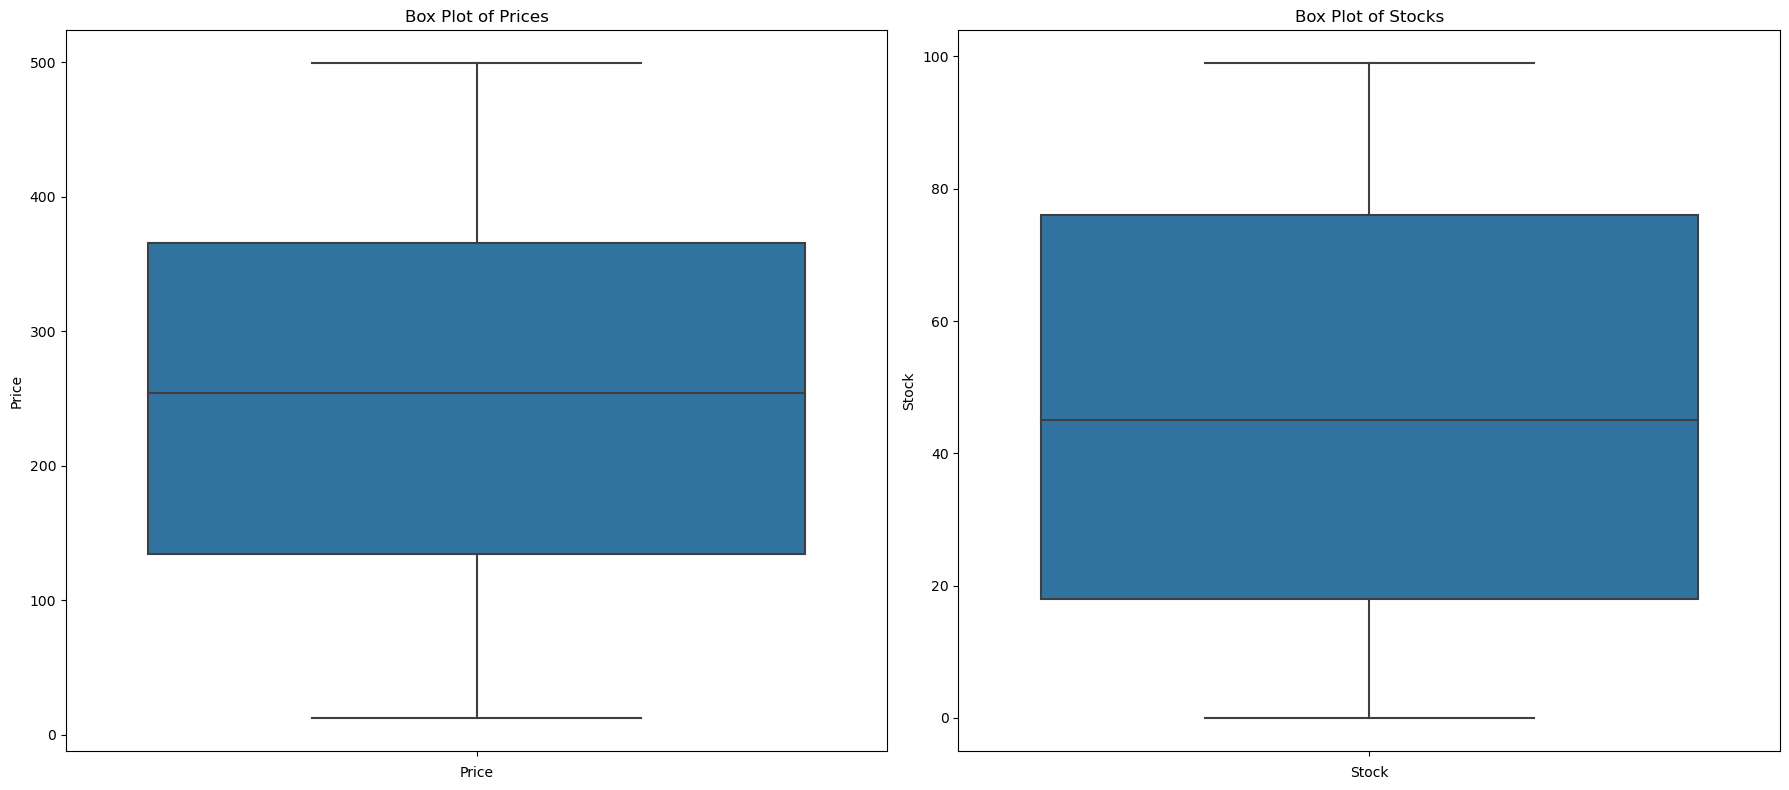

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Box plot for the 'Price' column
sns.boxplot(y=inventory_df['Price'], ax=axes[0])
axes[0].set_title('Box Plot of Prices')
axes[0].set_xlabel('Price')

# Box plot for the 'Stock' column
sns.boxplot(y=inventory_df['Stock'], ax=axes[1])
axes[1].set_title('Box Plot of Stocks')
axes[1].set_xlabel('Stock')

# Display the plots
plt.tight_layout()
plt.show()



Checkign for outlier or anomalies in the sales dataframe.


# Converting CSV Files to SQL Database for more advanced queries 

## Aim
The primary objective is to transform CSV data into a SQL database. This enables the execution of more sophisticated SQL queries, enhancing data analysis capabilities.


In [ ]:

from sqlalchemy import create_engine
engine = create_engine('mysql+pymysql://root@localhost/retail_database')

inventory_df.to_sql('inventory_data', engine, if_exists='append', index=False)
sales_df.to_sql('sales_transactions', engine, if_exists='append', index=False)


In [151]:
with engine.connect() as connection:
    
    inventory_df = pd.read_sql("SELECT * FROM inventory_data LIMIT 5", connection)
    sales_df = pd.read_sql("SELECT * FROM sales_transactions ORDER BY Date LIMIT 5", connection)

    # Display the DataFrames
    display(inventory_df)
    display(sales_df)


,Product_ID,Category,Description,Price,Stock
0,1,Toys & Games,Fashion-Wear 1,278.92,39
1,2,Sports & Outdoors,Kitchen-Tool 2,360.44,28
2,3,Toys & Games,Sports-Gear 3,305.35,24
3,4,Clothing,Toy-Item 4,276.99,18
4,5,Electronics,Electro-Gadget 5,217.59,67


,Transaction_ID,Date,Product_ID,Quantity_Sold,Store_Location
0,769,2022-01-01,390,7.0,"Mall Branch, Chicago"
1,524,2022-01-01,298,1.0,"Airport Kiosk, Houston"
2,279,2022-01-01,18,9.0,"Mall Branch, Chicago"
3,805,2022-01-01,77,4.0,"Mall Branch, Chicago"
4,295,2022-01-01,199,5.0,"Downtown Store, New York"


# Inventory Analysis:
1. Identify products with low stock levels and suggest reordering quantities.
2. Calculate the total value of inventory on hand for each product category.

In [199]:
with engine.connect() as connection:
    
    print("1)------------PRODUCTS WITH STOCK LESS THAN 10 --------------")
    low_stock = pd.read_sql("""
    SELECT Product_ID,Category, Description as "Product Name", Stock
    FROM inventory_data
    WHERE Stock <= 10
    ORDER BY Stock ASC 
    """, connection)
    display(low_stock)
    
    print("2)------------VALUE OF PRODUCTS IN STOCK PER EACH CATEGORY --------------")
    category_value_in_stock = pd.read_sql("""
    SELECT Category, SUM(Stock) as "Value of Stock"
    FROM inventory_data
    GROUP BY Category;
    """, connection)

    display(category_value_in_stock)
    
    
    ##I am adding another extra requriment, I will compare the stock levels against the sales per product and per category 
    #FIRST I will be finding  the sales per each  product in all stores, I have to perform an Left Join to get name of each product 
    #and to clearly see the stock level against the items sold 
    
    print("3)----------PRODUCTS SOLD DURING THIS YEAR AND CURRENT STOCK -------------")
    product_sales_stock = pd.read_sql("""
    SELECT i.Description as "Product_Name", SUM(s.Quantity_Sold) as Sold, i.Stock
    FROM inventory_data as i
    LEFT JOIN sales_transactions as s ON i.Product_ID = s.Product_ID 
    GROUP BY s.Product_ID 
    ORDER BY Sold DESC
    """, connection)
    display(product_sales_stock)
    
    #I will now compare the stock leveles against the sales per category, identifying the categories at risk 
    
    print("4)--------------CATEGORY SALES COMPARED WITH  THE STOCK LEVEL OF THE THAT CATEGORY --------------------------")
    
    
    category_sales_stock = pd.read_sql("""
    SELECT i.Category, SUM(s.Quantity_Sold) as Category_Sales, SUM(i.Stock) as Category_Stock
    FROM inventory_data as i 
    LEFT JOIN sales_transactions as s ON i.Product_ID = s.Product_ID 
    GROUP BY i.Category
    ORDER BY Category_Stock ASC
    """, connection)
    
    display(category_sales_stock)
    
    #Here we can tell that the stock per given category is quite balanced but per each products
    #the store lacks many top selling products  so I will identify using SQL the top sold products that got lack of stock or low stock
    print("5)--------------TOP SOLD PRODUCT WITH STOCK LEVEL < 20 --------------------------")
    top_selling_low_stock =  pd.read_sql("""
    SELECT i.Description as "Product_Name", SUM(s.Quantity_Sold) AS Quantity_Sold, Stock
    FROM inventory_data as i 
    LEFT JOIN sales_transactions as s ON i.Product_ID = s.Product_ID
    Where Stock < 20
    GROUP BY i.Description
    ORDER BY Quantity_Sold DESC
    """, connection)
    
    display(top_selling_low_stock)

1)------------PRODUCTS WITH STOCK LESS THAN 10 --------------


,Product_ID,Category,Product Name,Stock
0,10,Sports & Outdoors,Electro-Gadget 10,0
1,20,Home & Kitchen,Electro-Gadget 20,0
2,23,Electronics,Sports-Gear 23,0
3,281,Home & Kitchen,Fashion-Wear 281,0
4,324,Clothing,Toy-Item 324,0
...,...,...,...,...
73,78,Toys & Games,Sports-Gear 78,10
74,373,Clothing,Sports-Gear 373,10
75,447,Toys & Games,Kitchen-Tool 447,10
76,471,Electronics,Fashion-Wear 471,10


2)------------VALUE OF PRODUCTS IN STOCK PER EACH CATEGORY --------------


,Category,Value of Stock
0,Clothing,4558.0
1,Electronics,4643.0
2,Home & Kitchen,5055.0
3,Sports & Outdoors,4738.0
4,Toys & Games,4261.0


3)----------PRODUCTS SOLD DURING THIS YEAR AND CURRENT STOCK -------------


,Product_Name,Sold,Stock
0,Sports-Gear 343,59.00,0
1,Electro-Gadget 85,51.00,19
2,Toy-Item 59,50.66,13
3,Toy-Item 189,50.00,87
4,Toy-Item 259,50.00,98
...,...,...,...
486,Toy-Item 179,1.00,37
487,Electro-Gadget 180,1.00,88
488,Fashion-Wear 371,0.00,12
489,Kitchen-Tool 22,0.00,43


4)--------------CATEGORY SALES COMPARED WITH  THE STOCK LEVEL OF THE THAT CATEGORY --------------------------


,Category,Category_Sales,Category_Stock
0,Clothing,1791.82,16726.0
1,Toys & Games,1953.15,17899.0
2,Electronics,1671.02,17946.0
3,Sports & Outdoors,2204.75,20284.0
4,Home & Kitchen,2139.00,20570.0


5)--------------TOP SOLD PRODUCT WITH STOCK LEVEL < 20 --------------------------


,Product_Name,Quantity_Sold,Stock
0,Sports-Gear 343,59.00,0
1,Electro-Gadget 85,51.00,19
2,Toy-Item 59,50.66,13
3,Electro-Gadget 320,45.00,18
4,Toy-Item 369,41.00,15
...,...,...,...
128,Electro-Gadget 335,4.00,0
129,Fashion-Wear 106,4.00,16
130,Toy-Item 94,4.00,12
131,Kitchen-Tool 447,2.00,10


# Sales Analysis:
1. Analyze sales trends over time and identify peak sales periods.
2. Determine the best-selling products and their contribution to overall sales.